# **Pipelines**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
data.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'),data['SalePrice'], test_size=.2)

In [ ]:
percent_null_data = data.isnull().sum()/data.shape[0]*100

In [ ]:
fill_type_data = percent_null_data[percent_null_data > 20].keys()

In [ ]:
data.drop(columns=fill_type_data,inplace=True,axis=1)

In [ ]:
# handle missing value
trf1 = ColumnTransformer([
    ('impute_num_cols',SimpleImputer(),[3,25,57]),
    ('impute_categ_cols',SimpleImputer(strategy='most_frequent'),[24,29,30,31,32,34,41,56,58,61,62])
],remainder='passthrough')

In [ ]:
# handle categorical data
trf2 = ColumnTransformer([
    ('ohe_cols',OneHotEncoder(sparse=False, handle_unknown='ignore',dtype=np.int32),[2,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,
                                                                                     28,29,30,31,32,34,38,39,40,41,52,54,56,58,61,62,63,73,74])
],remainder='passthrough')

In [ ]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [ ]:
data['LotFrontage'].isnull().sum()

259

In [ ]:
#scalling
trf3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,76))
])

In [ ]:
trf4 = LinearRegression()

# **Create Pipeline**

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
])

In [ ]:
pipe.fit(X_train,y_train)

ValueError: ignored

In [ ]:
pipe.named_steps['trf1'].transformers_[1][1].statistics_

array(['VinylSd', 'PConc', 'TA', 'TA', 'No', 0, 'Y', 0, 'Attchd', 2, 0],
      dtype=object)

Accuracy Measure

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
pipe.score(X_test,y_test)

0.2122957758131393

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Survived'), df['Survived'], test_size=.2)

In [ ]:
df.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1


In [ ]:
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [ ]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False, dtype=np.int32, handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [ ]:
trf3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,10))
])

In [ ]:
trf4 = RandomForestClassifier()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('trf4', RandomForestClassifier())])

In [ ]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_

array([29.79994774])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6536312849162011

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# **Data Seeing**

In [ ]:
df = pd.read_csv('/content/honda_car_selling.csv')

In [ ]:
df["kms Driven"] = df["kms Driven"].apply(lambda x: x.replace("kms", ""))

In [ ]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [ ]:
df.shape

(999, 6)

In [ ]:
a = df['kms Driven'].astype('int32')

In [ ]:
df.drop(columns='kms Driven',inplace=True)

In [ ]:
df['Price'] = df['Price'].apply(lambda x : x.replace(',', ""))

In [ ]:
df.head(2)

,Year,Fuel Type,Suspension,Price,Car Model
0,2019,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT


In [ ]:
price_update = df['Price'].apply(lambda x: x.replace('Lakh',''))

In [ ]:
df.update(price_update)

In [ ]:
df.head(2)

,Year,Fuel Type,Suspension,Price,Car Model
0,2019,Petrol,Automatic,9.29,Honda City V CVT
1,2021,Petrol,Automatic,13.95,Honda City ZX CVT


In [ ]:
b = df['Price'].astype('float32')

In [ ]:
df.update(b)

In [ ]:
df.head(2)

,Year,Fuel Type,Suspension,Price,Car Model
0,2019,Petrol,Automatic,9.29,Honda City V CVT
1,2021,Petrol,Automatic,13.95,Honda City ZX CVT


In [ ]:
df = pd.concat([df,pd.DataFrame(a)], axis=1)

In [ ]:
df.head(6)

,Year,Fuel Type,Suspension,Price,Car Model,kms Driven
0,2019,Petrol,Automatic,9.29,Honda City V CVT,19006
1,2021,Petrol,Automatic,13.95,Honda City ZX CVT,11936
2,2018,Petrol,Automatic,9.95,Honda City i-VTEC CVT ZX,29635
3,2020,Petrol,Automatic,13.26,Honda City ZX CVT,16163
4,2015,Petrol,Manual,5.68,Honda City i VTEC V,105114
5,2015,Diesel,Manual,5.65,Honda City i DTEC S,101466


## **Create ColumnTransformer**

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 315 to 758
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        799 non-null    int64 
 1   Fuel Type   799 non-null    object
 2   Suspension  799 non-null    object
 3   Car Model   799 non-null    object
 4   kms Driven  799 non-null    int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 34.3+ KB


In [ ]:
X_test.head(2)

,Year,Fuel Type,Suspension,Car Model,kms Driven
966,2018,Diesel,Manual,Honda City i-DTEC V,60000
886,2010,Petrol,Manual,Honda City 1.5 V MT,50000


In [ ]:
trf1 = ColumnTransformer([
    ('oe_Suspension',OrdinalEncoder(categories=['Manual','Automatic']),[2]),
    ('ohe_Fuel Type',OneHotEncoder(sparse=False,handle_unknown='ignore',dtype=np.int32),[1,3])
],remainder='passthrough')

In [ ]:
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,9))
])

In [ ]:
trf3 = LinearRegression()

# **Create Pipeline**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price'],axis=1), df['Price'], test_size=.2)

In [ ]:
X_train

,Year,Fuel Type,Suspension,Car Model,kms Driven
619,2019,Petrol,Manual,Honda Amaze V Petrol BSIV,12494
284,2009,Petrol,Manual,Honda City 1.5 S MT,83088
327,2008,Petrol,Manual,Honda City 1.5 S MT,131990
161,2016,Petrol,Manual,Honda Amaze S i-VTEC,33397
482,2009,Petrol,Automatic,Honda Civic 1.8 V AT,92034
...,...,...,...,...,...
209,2017,Petrol,Automatic,Honda City ZX CVT,70000
746,2013,Petrol,Automatic,Honda City V AT,54341
561,2010,Petrol,Manual,Honda City 1.5 E MT,70000
983,2016,Diesel,Manual,Honda Jazz 1.5 VX i DTEC,35000


In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf3',trf3)
])

In [ ]:
pipe.fit(X_train, y_train)

ValueError: ignored

In [ ]:
X_train.shape

(799, 5)

In [ ]:
y_train.shape

(799,)

In [ ]:
df['Fuel Type'].value_counts()

 Petrol     797
 Diesel     201
 CNG          1
Name: Fuel Type, dtype: int64

In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('/content/MagicBricks.csv')

## **Understand Data**

In [ ]:
data.head(6)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Price',axis=1), data['Price'],test_size=.2)

In [ ]:
trf1 = ColumnTransformer([
    ('impute_Bath_Park_Per_sqr',SimpleImputer(),[2,5,9]),
    ('impute_Fur_Type',SimpleImputer(strategy='most_frequent'),[3,8])
],remainder='passthrough')

In [ ]:
trf2 = ColumnTransformer([
    ('oe_Fur',OrdinalEncoder(categories=[['Unfurnished','Semi-Furnished','Furnished'],['Ready_to_move','Almost_ready'],
                                         ['Resale','New_Property'],['Apartment','Builder_Floor']]),[3,6,7,8]),
    ('ohe_lacolty',OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int32),[4])
],remainder='passthrough')

In [ ]:
data['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

In [ ]:
trf3 = LinearRegression()

In [ ]:
X_test.head(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
711,1440.0,3,3.0,Unfurnished,Alaknanda,1.0,Ready_to_move,Resale,Apartment,12500.0
72,2160.0,4,3.0,Unfurnished,"Chander Lok Apartment, Dwarka Sector 19",1.0,Ready_to_move,Resale,Apartment,3524.0
492,2700.0,4,3.0,Semi-Furnished,"APL Builder Floor, Greater Kailash 1",1.0,Ready_to_move,New_Property,Builder_Floor,22222.0


## **Create Pipeline**

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [ ]:
pipe.fit(X_train,y_train)

ValueError: ignored

In [ ]:
X_train

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
1020,1135.0,3,3.0,Furnished,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,14366.0
898,425.0,1,1.0,Unfurnished,Narela,1.0,Ready_to_move,Resale,Apartment,5176.0
1122,1450.0,3,3.0,Semi-Furnished,"Punjabi Bagh Enclave, Punjabi Bagh",2.0,Ready_to_move,Resale,Builder_Floor,11905.0
1133,17010.0,3,3.0,Semi-Furnished,Punjabi Bagh West,2.0,Ready_to_move,Resale,Builder_Floor,15278.0
524,380.0,1,1.0,Unfurnished,Geeta Colony,1.0,Ready_to_move,Resale,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
899,750.0,2,2.0,Unfurnished,Malviya Nagar,NaN,Almost_ready,New_Property,Builder_Floor,NaN
513,1250.0,2,1.0,Semi-Furnished,"DDA Flats Mansarovar Park, Seelampur, Shahdara",NaN,Ready_to_move,Resale,Apartment,4444.0
304,1000.0,3,2.0,Furnished,"Rohitash Nagar East, Shahdara",1.0,Ready_to_move,Resale,Builder_Floor,NaN
839,800.0,3,2.0,Semi-Furnished,Mahavir Enclave,1.0,Ready_to_move,New_Property,Builder_Floor,NaN


In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head(6)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,"Moran, Mr. James",3,male,NaN,0,0,330877,8.4583,NaN,Q,0


In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=.2)

In [ ]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
830,3,female,15.0,1,0,14.4542,C
75,3,male,25.0,0,0,7.6500,S


In [ ]:
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [ ]:
trf2 = ColumnTransformer([
    ('oe_embar_sex', OneHotEncoder(sparse=False, dtype=np.int32, handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [ ]:
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,15))
])

In [ ]:
trf4 = DecisionTreeClassifier()

# Pipeline

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_embar_sex',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 15, None))])),
                ('trf4', DecisionTreeClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6033519553072626

In [ ]:
input = np.array([3,'female',15,1,0,14.45,'C'],dtype='object').reshape(1,7)

In [ ]:
pipe.predict(input)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
830,3,female,15.0,1,0,14.4542,C
75,3,male,25.0,0,0,7.6500,S
125,3,male,12.0,1,0,11.2417,C
579,3,male,32.0,0,0,7.9250,S
241,3,female,NaN,1,0,15.5000,Q
...,...,...,...,...,...,...,...
373,1,male,22.0,0,0,135.6333,C
92,1,male,46.0,1,0,61.1750,S
187,1,male,45.0,0,0,26.5500,S
624,3,male,21.0,0,0,16.1000,S


In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/Laptop-Users.csv')

In [ ]:
X_train.head(2)

,Age,Gender,Region,Occupation,Income
1,34,female,city,teacher,22000
9,27,female,city,student,7000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Has Laptop'), df['Has Laptop'], test_size=.2)

In [ ]:
trf1 = ColumnTransformer([
    ('oe_occupation',OrdinalEncoder(categories=['teacher','student','officer','banker']),[3]),
    ('one_gender_reign',OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int32),[1,2])
],remainder='passthrough')

In [ ]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,8))
])

In [ ]:
trf3 = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [ ]:
pipe.fit(X_train, y_train)

ValueError: ignored

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

Data Loading

In [ ]:
data = pd.read_csv('/content/Property Sales of Melbourne City.csv')

In [ ]:
pd.set_option('display.max_columns', None)

Data Understand

In [ ]:
data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

<Axes: >

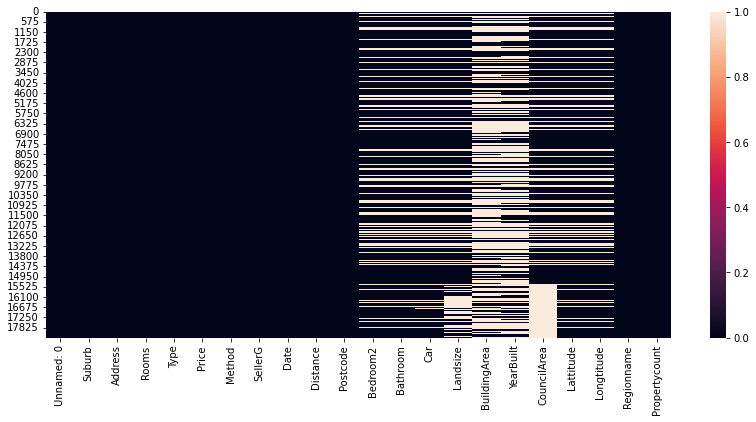

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(data.isnull())

In [ ]:
percent_data = data.isnull().sum()/data.shape[0]*100

In [ ]:
null_cols = percent_data[percent_data > 20].keys()

In [ ]:
data.drop(null_cols, axis=1,inplace=True)

<Axes: >

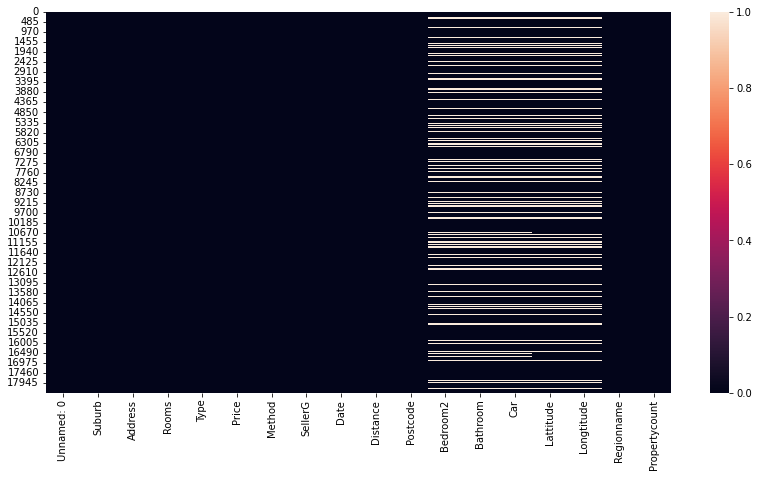

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data.isnull())

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns='Price',axis=1), data['Price'],test_size=.2)

In [ ]:
X_train.isnull().sum()

Address           0
Rooms             0
Type              0
Method            0
Date              0
Distance          0
Postcode          0
Bedroom2         75
Bathroom         75
Car              78
Lattitude        70
Longtitude       70
Regionname        0
Propertycount     0
dtype: int64

In [ ]:
X_train.head(6)

,Address,Rooms,Type,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Regionname,Propertycount
2049,10 Goold St,3,h,VB,28/05/2016,11.7,3125.0,3.0,1.0,1.0,-37.85500,145.11800,Southern Metropolitan,5678.0
17066,23 Volga St,3,h,S,19/08/2017,11.2,3046.0,3.0,1.0,3.0,-37.70724,144.94072,Northern Metropolitan,2606.0
10340,11 Challis St,3,h,S,29/04/2017,8.4,3015.0,3.0,1.0,3.0,-37.84810,144.87210,Western Metropolitan,5498.0
11075,2 Bazentin St,3,h,S,1/07/2017,10.5,3020.0,3.0,1.0,0.0,-37.77917,144.82223,Western Metropolitan,2185.0
12565,25 Gardenvale Rd,4,h,VB,24/06/2017,8.7,3162.0,4.0,2.0,2.0,-37.89918,145.01679,Southern Metropolitan,5051.0
10289,79 Ormond Rd,2,h,S,8/04/2017,6.9,3039.0,2.0,1.0,2.0,-37.77300,144.93320,Western Metropolitan,6232.0


In [ ]:
trf1 = ColumnTransformer([
    ('impute_dis_post', SimpleImputer(strategy=''),[7,8,9,10,11]),
],remainder='passthrough')

In [ ]:
trf2 = ColumnTransformer([
    ('ohe_Address', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0,4,12]),
    ('oe_', OrdinalEncoder(categories=[['h','u','t'],['S','SP','PI','VB','SA']]),[2,3])
],remainder='passthrough')

In [ ]:
trf3 = LinearRegression()

Pipeline

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: ignored

In [ ]:
X_train.drop(columns='Address',axis=1,inplace=True)

In [ ]:
X_train.drop(['Unnamed: 0','Suburb','SellerG'],axis=1,inplace=True)

In [ ]:
X_train[X_train['Address']==2.923308774279973]

,Address,Rooms,Type,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Regionname,Propertycount


In [ ]:
X_train.drop(X_train.index[500:14714],axis=0,inplace=True)

In [ ]:
X_train['Rooms'].isnull().sum()

0

In [ ]:
y_train.isnull().sum()

0

In [ ]:
X_train.shape

(500, 14)

In [ ]:
Pipeline(trf1)

Pipeline(steps=ColumnTransformer(remainder='passthrough',
                                 transformers=[('impute_dis_post',
                                                SimpleImputer(),
                                                [7, 8, 9, 10, 11])]))

In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/')
df.shape

(204, 26)

In [ ]:
df['two'].value_counts()

four    114
two      88
?         2
Name: two, dtype: int64

In [ ]:
df.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [ ]:
df.drop(['	3','?','alfa-romero',''])

3              0
?              0
alfa-romero    0
gas            0
std            0
two            0
convertible    0
rwd            0
front          0
88.60          0
168.80         0
64.10          0
48.80          0
2548           0
dohc           0
four           0
130            0
mpfi           0
3.47           0
2.68           0
9.00           0
111            0
5000           0
21             0
27             0
13495          0
dtype: int64

In [ ]:
trf1 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,21))
])

In [ ]:
trf2 = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 21, None))])),
                ('trf2', DecisionTreeClassifier())])

In [83]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [25]:
df.drop(df.index[2000:],inplace=True)

In [45]:
df.drop([' 77516','Adm-clerical','White',' 13',' 2174',' 0',' 40'],axis=1,inplace=True)

In [27]:
df.shape

(2000, 15)

In [34]:
df.rename(columns={' State-gov':'State-gov',' Bachelors':'Bachelors',' Never-married':'Never-married',' Adm-clerical':'Adm-clerical',
                   ' Not-in-family':'Not-in-family',' White':'White',' Male':'Male',' United-States':'United-States',' <=50K':'<=50K'},inplace=True)

In [61]:
df['State-gov'].value_counts().keys()

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

In [46]:
df.head(6)

,State-gov,Bachelors,Never-married,Not-in-family,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Not-in-family,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Husband,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Wife,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Wife,Female,United-States,<=50K
5,Private,9th,Married-spouse-absent,Not-in-family,Female,Jamaica,<=50K


In [68]:
trf1 = ColumnTransformer([
    ('oe_st-gov',OrdinalEncoder(categories=[[' Never-worked',' Without-pay',' ?',' Self-emp-not-inc',' Self-emp-inc',' Private',' Local-gov', ' State-gov',' Federal-gov'],
                                            [ ' Preschool', ' 1st-4th', ' 5th-6th',' 7th-8th', ' 9th', ' 10th',' 11th', ' 12th',' Prof-school', ' Some-college',
                                             ' Bachelors', ' Masters', ' Assoc-voc',' Assoc-acdm', ' Doctorate', ' HS-grad'],
                                            [' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',' Widowed', ' Married-spouse-absent',' Married-AF-spouse'],
                                            [ ' Unmarried',' Other-relative', ' Own-child', ' Not-in-family', ' Wife', ' Husband']]),[0,1,2,3]),
    ('one_hot_gender',OneHotEncoder(sparse=False, handle_unknown='ignore',dtype=np.int32),[4])
])

In [69]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,8))
])

In [94]:
trf3 = RandomForestClassifier(n_estimators=100)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('<=50K',axis=1), df['<=50K'], test_size=.2)

In [95]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [96]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('oe_st-gov',
                                                  OrdinalEncoder(categories=[[' '
                                                                              'Never-worked',
                                                                              ' '
                                                                              'Without-pay',
                                                                              ' '
                                                                              '?',
                                                                              ' '
                                                                              'Self-emp-not-inc',
                                                                              ' '
                                                                              'Self-emp-inc',
                                                                              ' '
                                                                              'Private',
                                                                              ' '
                                                                              'Local-gov',
                                                                              ' '
                                                                              'State-gov',
                                                                              ' '
                                                                              'Federal-gov'],
                                                                             [' '
                                                                              'Preschool',
                                                                              ' '
                                                                              '1st-4th',
                                                                              ' '
                                                                              '5th-6th',
                                                                              ' '
                                                                              '7th-8th',
                                                                              ' '
                                                                              '9th',
                                                                              ' '
                                                                              '10th',
                                                                              ' '
                                                                              '11th',
                                                                              ' '
                                                                              '12th',
                                                                              ' '
                                                                              'Prof-school',
                                                                              ' '
                                                                              'Some-college',...
                                                                              'Married-spouse-absent',
                                                                              ' '
                                                                              'Married-AF-spouse'],
                                                                             [' '
                                                                              'Unmarried',
                                                                              ' '
                                                                              'Other-relative',


In [97]:
y_pred = pipe.predict(X_test)

In [98]:
pipe.score(X_test, y_test)

0.8217137592137592

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8217137592137592

In [100]:
input = [' Private',' Prof-school',' Married-civ-spouse',' Husband',' Male',' United-States']

In [101]:
pipe.predict([input])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([' >50K'], dtype=object)

In [102]:
X_train

,State-gov,Bachelors,Never-married,Not-in-family,Male,United-States
17476,Private,10th,Divorced,Unmarried,Female,United-States
14867,Private,HS-grad,Never-married,Own-child,Female,United-States
9198,Private,Prof-school,Married-civ-spouse,Husband,Male,United-States
12203,Federal-gov,Some-college,Married-civ-spouse,Husband,Male,United-States
31373,Private,HS-grad,Never-married,Own-child,Male,United-States
...,...,...,...,...,...,...
31913,Private,Bachelors,Separated,Not-in-family,Male,United-States
22124,Private,7th-8th,Divorced,Unmarried,Female,United-States
24967,Private,Some-college,Married-civ-spouse,Husband,Male,United-States
32187,Private,Bachelors,Never-married,Not-in-family,Female,United-States


In [82]:
y_train

17476     <=50K
14867     <=50K
9198       >50K
12203      >50K
31373     <=50K
          ...  
31913      >50K
22124     <=50K
24967      >50K
32187     <=50K
13393      >50K
Name: <=50K, Length: 26048, dtype: object